**Phase 1: Implement Basic NLP Tasks (POS, Embedding Techniques)**

In [1]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

data_path = "data"
loader = PyPDFDirectoryLoader(data_path)
documents = loader.load()

# Combine all PDF content into one string
text = " ".join([doc.page_content for doc in documents])
print(text[:1000])  # Preview the text


Learn and Master
Progressive Chess
Matej Guid The electronic edition of this book is available at URL: http://zalozba.fri.uni-lj.si/guid2017.pdf. 
 
 
 
 
 
 
 
 
 
 
 
 
Copyright © 2017 Založba UL FRI. All rights reserved. 
Reviewers: prof. dr. Ivan Bratko, prof. dr. H. Jaap van den Herik 
Proofreading: prof. dr. Walter A. Kosters 
Publisher: Založba UL FRI, Ljubljana 
University of Ljubljana, Faculty of Computer and Information Science 
First edition, 2017 
Design of book cover: Bojana Fortuna 
Illustrations: prof. dr. Matej Guid with DeepArt.io 
Editor: prof. dr. Franc Solina 
The CIP record was created by the National and University Library Ljubljana. 
COBISS.SI-ID=293222144 
ISBN 978-961-6209-96-0 (pdf) Preface 
 
Progressive chess is an incredibly exciting game. This chess variant was particularly popular among 
Italian players in the last two decades of the previous century, but seems to be almost forgotten at 
the time of this writing. The aim of this book is to pr ovide train

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Lowercase + remove special characters
text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text.lower())

# Tokenize words & remove stopwords
tokens = word_tokenize(text_cleaned)
stop_words = set(stopwords.words("english"))
tokens_cleaned = [word for word in tokens if word not in stop_words]

# Lemmatize tokens
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_cleaned]
print(tokens_lemmatized[:50])


['learn', 'master', 'progressive', 'chess', 'matej', 'guid', 'electronic', 'edition', 'book', 'available', 'url', 'httpzalozbafriuniljsiguidpdf', 'copyright', 'zaloba', 'ul', 'fri', 'right', 'reserved', 'reviewer', 'prof', 'dr', 'ivan', 'bratko', 'prof', 'dr', 'h', 'jaap', 'van', 'den', 'herik', 'proofreading', 'prof', 'dr', 'walter', 'kosters', 'publisher', 'zaloba', 'ul', 'fri', 'ljubljana', 'university', 'ljubljana', 'faculty', 'computer', 'information', 'science', 'first', 'edition', 'design', 'book']


In [3]:
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# POS Tagging
pos_tags = pos_tag(tokens_lemmatized)

# Count POS types
pos_counts = Counter(tag for word, tag in pos_tags)

In [4]:
from gensim.models import Word2Vec

# Prepare data for Word2Vec: list of tokenized sentences
sentences = [word_tokenize(sent.lower()) for sent in sent_tokenize(text_cleaned)]
sentences = [[lemmatizer.lemmatize(word) for word in sentence if word not in stop_words] for sentence in sentences]

# Train Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Check similar words
w2v_model.wv.most_similar("chess")


[('may', 0.9994184970855713),
 ('move', 0.9993192553520203),
 ('piece', 0.9993160963058472),
 ('progressive', 0.9992883801460266),
 ('opening', 0.9992579221725464),
 ('check', 0.9992310404777527),
 ('game', 0.9992273449897766),
 ('king', 0.9992229342460632),
 ('also', 0.9992210268974304),
 ('endgame', 0.9992185235023499)]

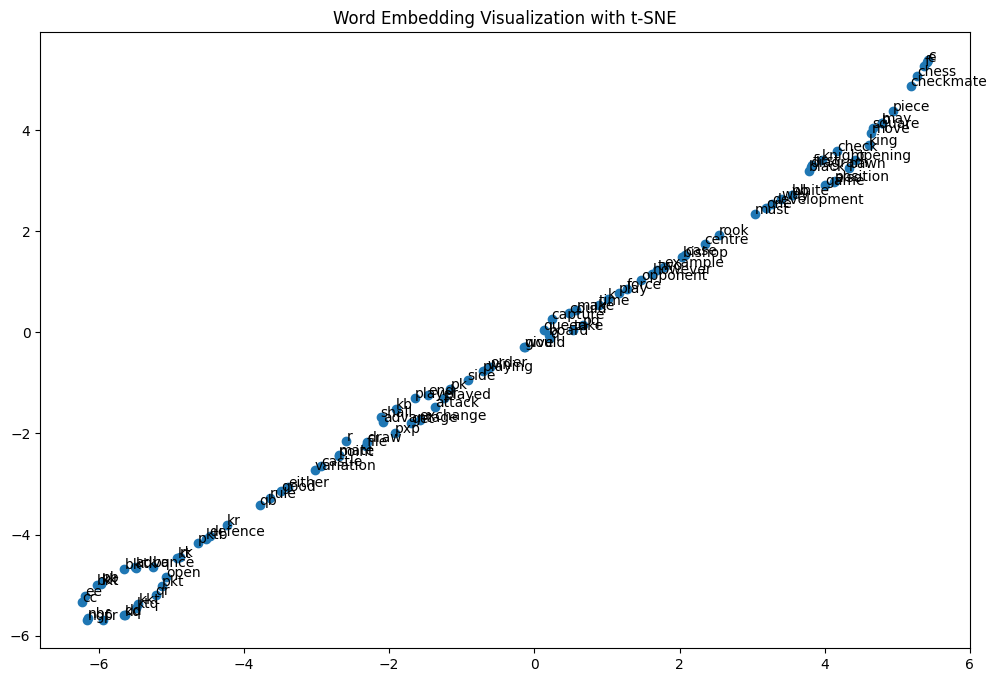

In [5]:
from sklearn.manifold import TSNE
import numpy as np

# Pick words from the vocab
words = list(w2v_model.wv.index_to_key)[:100]
vectors = np.array([w2v_model.wv[word] for word in words])

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("Word Embedding Visualization with t-SNE")
plt.show()

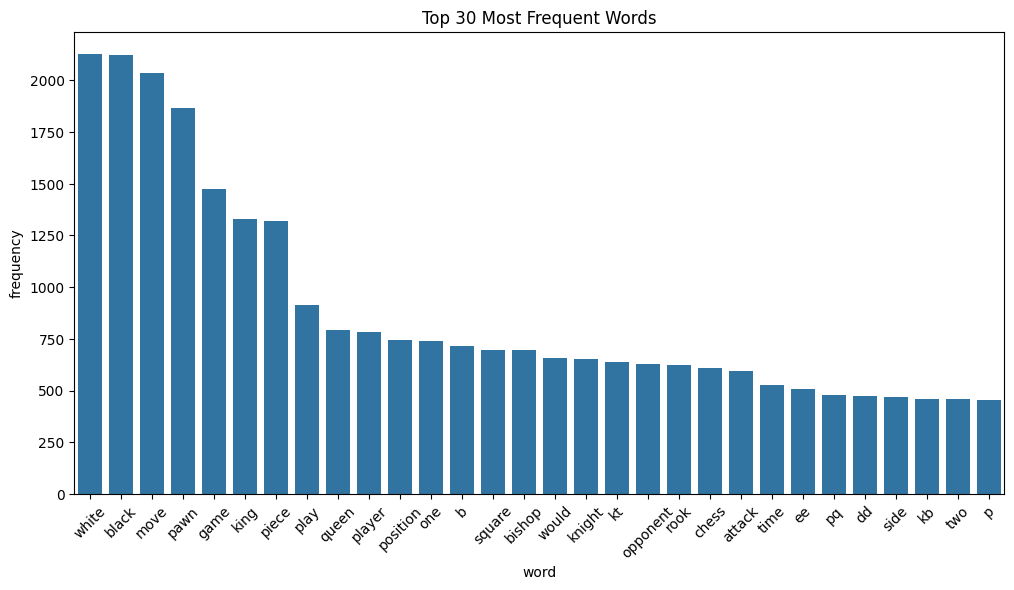

In [6]:
from collections import Counter
import pandas as pd

# Count top 30 most frequent words
word_freq = Counter(tokens_lemmatized)
most_common = word_freq.most_common(30)

# Plot
df_common = pd.DataFrame(most_common, columns=["word", "frequency"])

plt.figure(figsize=(12, 6))
sns.barplot(x="word", y="frequency", data=df_common)
plt.title("Top 30 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()


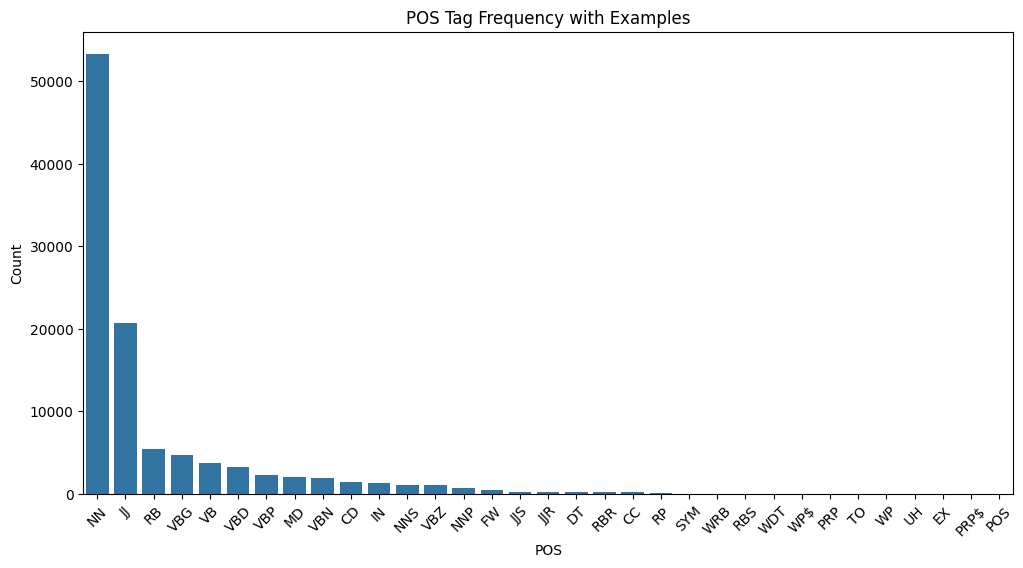

,POS,Examples,Count
1,NN,"master, chess, matej, guid, edition",53340
0,JJ,"learn, progressive, electronic, available, url",20726
2,RB,"right, incredibly, particularly, almost, also",5394
5,VBG,"proofreading, writing, training, mastering, ch...",4708
12,VB,"lead, provide, fun, obtain, check",3711
3,VBD,"reserved, created, created, developed, received",3312
7,VBP,"publisher, variant, learn, make, hope",2239
11,MD,"may, may, would, may, may",2047
13,VBN,"used, presented, become, specified, spent",1981
9,CD,"two, one, one, two, one",1492


In [7]:
from collections import defaultdict

# Create dictionary of POS to words
pos_word_map = defaultdict(list)
for word, tag in pos_tags:
    if len(pos_word_map[tag]) < 5:
        pos_word_map[tag].append(word)

# Convert to DataFrame
pos_summary = pd.DataFrame({
    "POS": list(pos_word_map.keys()),
    "Examples": [", ".join(words) for words in pos_word_map.values()],
    "Count": [pos_counts[tag] for tag in pos_word_map.keys()]
})

# Sort and plot
pos_summary = pos_summary.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=pos_summary, x="POS", y="Count")
plt.title("POS Tag Frequency with Examples")
plt.xticks(rotation=45)
plt.show()

# Show table
pos_summary.head(10)
